In [2]:
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pathlib import Path
from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image
from tensorflow.keras.utils import load_img, img_to_array


In [52]:
LOCAL_DATA_PATH = os.path.join(os.path.expanduser('~'), ".morpho_minds_data")
plates = ['24585'] #'24277','24639'

all_data_dfs = []
paths_df_phgolgi = []
paths_df_third = []
paths_df_ERSytoBleed = []
for platenr in plates:
    data_df = pd.read_csv(os.path.join(LOCAL_DATA_PATH, platenr, 'processed', f'{platenr}_small.csv'))
    data_df['Plate'] = platenr
    all_data_dfs.append(data_df)
    paths_df_phgolgi.extend(
        data_df['PhGolgi'].map(lambda x: str(Path(LOCAL_DATA_PATH).joinpath(platenr, 'raw', 'pictures', f'{platenr}-Ph_golgi', x.split('/')[-1]))).tolist()
        )
    paths_df_third.extend(
    data_df['Hoechst'].map(lambda x: str(Path(LOCAL_DATA_PATH).joinpath(platenr, 'raw', 'pictures', f'{platenr}-Hoechst', x.split('/')[-1]))).tolist()
    )
    paths_df_ERSytoBleed.extend(
    data_df['ERSytoBleed'].map(lambda x: str(Path(LOCAL_DATA_PATH).joinpath(platenr, 'raw', 'pictures', f'{platenr}-ERSytoBleed', x.split('/')[-1]))).tolist()
    )
concatenated_df = pd.concat(all_data_dfs, ignore_index=True)

In [20]:
# Initialize dictionaries to hold file paths and images for multip channels
channel_image_files_multip = {'ERSytoBleed': [], 'Ph_golgi': [], 'ERSyto':[]}
channel_images_mp = {'ERSytoBleed': [], 'Ph_golgi': [], 'ERSyto':[]}

# Loop through paths and load images for the ERSytoBleed channel
for path in paths_df_ERSytoBleed:
    channel_image_files_multip['ERSytoBleed'].append(path)

    img = load_img(path, target_size=(224, 224), color_mode='grayscale')
    img_array = img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)

    channel_images_mp['ERSytoBleed'].append(img_array_expanded)

# Loop through paths and load images for the PhGolgi channel
for path in paths_df_phgolgi:
    channel_image_files_multip['Ph_golgi'].append(path)

    img = load_img(path, target_size=(224, 224), color_mode='grayscale')
    img_array = img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)

    channel_images_mp['Ph_golgi'].append(img_array_expanded)

for path in paths_df_third:
    channel_image_files_multip['ERSyto'].append(path)

    img = load_img(path, target_size=(224, 224), color_mode='grayscale')
    img_array = img_to_array(img)
    img_array_expanded = np.expand_dims(img_array, axis=0)

    channel_images_mp['ERSyto'].append(img_array_expanded)

# Stack images to create a batch for each channel
images_batch_ersyto = np.vstack(channel_images_mp['ERSytoBleed'])
images_batch_phgolgi = np.vstack(channel_images_mp['Ph_golgi'])
images_batch_third = np.vstack(channel_images_mp['ERSyto'])

# Combine images from multip channels along the channel axis
images_batch_multip = np.concatenate((images_batch_ersyto, images_batch_phgolgi,images_batch_third), axis=-1)
images_batch_multip.shape


(4606, 224, 224, 3)

In [21]:
images_batch_multip = images_batch_multip/65535

In [23]:
X_train_mp, X_test_mp, y_train_mp, y_test_mp = train_test_split(images_batch_multip, concatenated_df['MeanArea'], test_size=0.2, random_state=42, shuffle=True)
X_train_mp.shape, X_test_mp.shape, y_train_mp.shape, y_test_mp.shape

((3684, 224, 224, 3), (922, 224, 224, 3), (3684,), (922,))

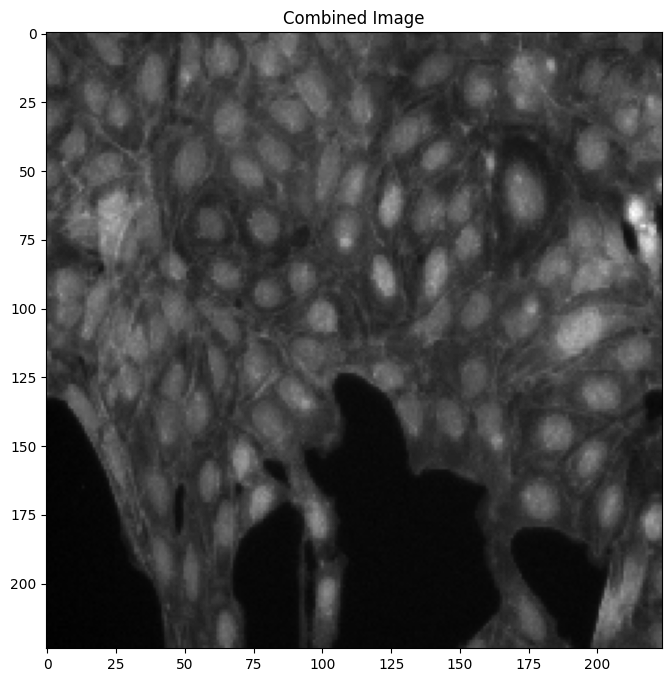

3647    2764.402062
4299    4634.466667
3534    2951.275862
240     2640.329897
3500    2690.694737
           ...     
2274    3214.580247
1881    2416.009091
2759    3472.259740
1814    2019.031746
1839    2984.736842
Name: MeanArea, Length: 922, dtype: float64

In [38]:
bcombined_image = (X_test_mp[0][:, :, 0] + X_test_mp[0][:, :, 1]) / 2.0  # + X_test_trip[0][:,:,2]

plt.figure(figsize=(10, 8))
plt.imshow(combined_image, cmap='gray')
plt.title('Combined Image')
plt.show()
y_test_mp

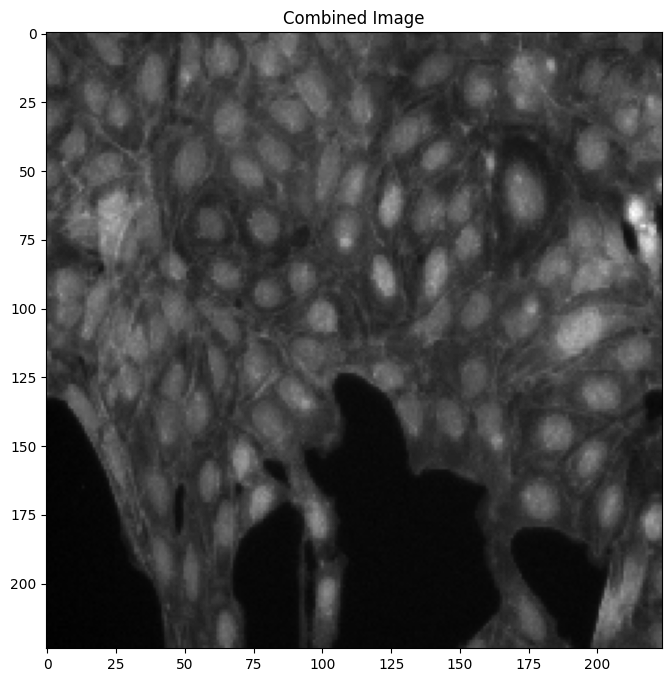

3647    2764.402062
4299    4634.466667
3534    2951.275862
240     2640.329897
3500    2690.694737
           ...     
2274    3214.580247
1881    2416.009091
2759    3472.259740
1814    2019.031746
1839    2984.736842
Name: MeanArea, Length: 922, dtype: float64

In [36]:
#ERSyto, ERSytoBleed and PhGolgi
combined_image = (X_test_mp[0][:, :, 0] + X_test_mp[0][:, :, 1] + X_test_mp[0][:,:,2]) / 3.0  # + X_test_trip[0][:,:,2]

plt.figure(figsize=(10, 8))
plt.imshow(combined_image, cmap='gray')
plt.title('Combined Image')
plt.show()
y_test_mp

In [39]:
img = load_img(path, target_size=(224, 224), color_mode='grayscale')
img_array = img_to_array(img)
img_array_expanded = np.expand_dims(img_array, axis=0)

In [51]:
concatenated_df

,PhGolgi,Hoechst,ERSyto,Mito,ERSytoBleed,CellCount,Well,PhotoNumber,Role,MMoles,Plate,MeanArea
0,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,131,a13,1,mock,0.000000,24585,2189.419847
1,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,129,a13,2,mock,0.000000,24585,2120.147287
2,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,97,a13,3,mock,0.000000,24585,2892.979381
3,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,173,a13,4,mock,0.000000,24585,1658.196532
4,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,151,a13,5,mock,0.000000,24585,1798.523179
...,...,...,...,...,...,...,...,...,...,...,...,...
2299,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,103,p24,2,treated,5.020317,24585,2766.640777
2300,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,85,p24,3,treated,5.020317,24585,3438.423529
2301,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,99,p24,4,treated,5.020317,24585,2904.797980
2302,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,https://storage.cloud.google.com/cell_profiles...,81,p24,5,treated,5.020317,24585,2935.703704


In [53]:
print(paths_df_phgolgi[0])
print(paths_df_ERSytoBleed[0])
print(paths_df_third[0])

/Users/thorsten/.morpho_minds_data/24585/raw/pictures/24585-Ph_golgi/cdp2bioactives-au00026722_a13_s1_w4996a376f-8b7c-445e-a8c6-4e4aef2a91a5.tif
/Users/thorsten/.morpho_minds_data/24585/raw/pictures/24585-ERSytoBleed/cdp2bioactives-au00026722_a13_s1_w3afbf0cae-ea1f-4254-a15b-8fae0e121741.tif
/Users/thorsten/.morpho_minds_data/24585/raw/pictures/24585-Hoechst/cdp2bioactives-au00026722_a13_s1_w145eeb977-b06f-46aa-9dd0-0d5190b51ee5.tif
